In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd
import os

In [3]:
# List all files in the input directory
input_dir = "/kaggle/input"
files = os.listdir(input_dir)

# Print the list of files
print(files)


['house-prices-advanced-regression-techniques']


In [4]:
sample = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [5]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [6]:
df = pd.concat([train,test],ignore_index = True)

In [7]:
price = df.pop('SalePrice')

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
print(f'training data shape {train.shape} and the testing data shape {test.shape} and the shape of dataset is {df.shape}')

training data shape (1460, 81) and the testing data shape (1459, 80) and the shape of dataset is (2919, 80)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [11]:
pd.set_option('display.max_rows', 10)


In [12]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [13]:
df.drop(columns = ['Alley','PoolQC','Fence','MiscFeature'],inplace = True)

In [14]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [15]:
# Fill missing values in 'LotFrontage' with the mean of the column
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())


In [16]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [17]:
df['BsmtQual'] = df['BsmtQual'].fillna('NoBsmt')

In [18]:
df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [19]:
df['BsmtCond'] = df['BsmtCond'].fillna('NoBsmt')

In [20]:
df['BsmtExposure'] = df['BsmtExposure'].fillna('NoBsmt')

In [21]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NoBsmt')

In [22]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NoBsmt')

In [23]:
df['Electrical'].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [24]:
df['Electrical'] = df['Electrical'].fillna('Unknown')

In [25]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64

In [26]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('NoFireplace')

In [27]:
df['GarageType'].value_counts()

GarageType
Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: count, dtype: int64

In [28]:
df['GarageType'] = df['GarageType'].fillna('NoGarage')

In [29]:
df['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933., 1917.,
       1896., 1895., 2207., 1943., 1919.])

In [30]:
df['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905, 1907, 1896, 1902, 1895, 1879, 1901])

In [31]:
correlation = df['YearBuilt'].corr(df['GarageYrBlt'])
print(correlation)

0.8348123731631015


In [32]:
df.loc[df['GarageYrBlt'].isna(), 'GarageYrBlt'] = df['YearBuilt']

In [33]:
df['GarageFinish'] = df['GarageFinish'].fillna('NoGarage')
df['GarageQual'] = df['GarageQual'].fillna('NoGarage')
df['GarageCond'] = df['GarageCond'].fillna('NoGarage')

In [34]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [35]:


# Identify missing values
missing_values = df.isna().sum()
columns_with_missing = missing_values[missing_values > 0]
print(columns_with_missing)

MSZoning       4
Utilities      2
Exterior1st    1
Exterior2nd    1
BsmtFinSF1     1
              ..
KitchenQual    1
Functional     2
GarageCars     1
GarageArea     1
SaleType       1
Length: 15, dtype: int64


In [36]:
# Determine data types of columns with missing values
data_types = df.dtypes[columns_with_missing.index]
print(data_types)


MSZoning        object
Utilities       object
Exterior1st     object
Exterior2nd     object
BsmtFinSF1     float64
                ...   
KitchenQual     object
Functional      object
GarageCars     float64
GarageArea     float64
SaleType        object
Length: 15, dtype: object


In [37]:
# Iterate through columns with missing values
missing_columns = columns_with_missing.index
for column in missing_columns:
    if data_types[column] == 'object':  # Categorical column
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)
    else:  # Numerical column
        mean_value = df[column].mean()
        df[column] = df[column].fillna(mean_value)


In [38]:
len(df[df.duplicated()])

0

**EDA**

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df['SalePrice'] = price

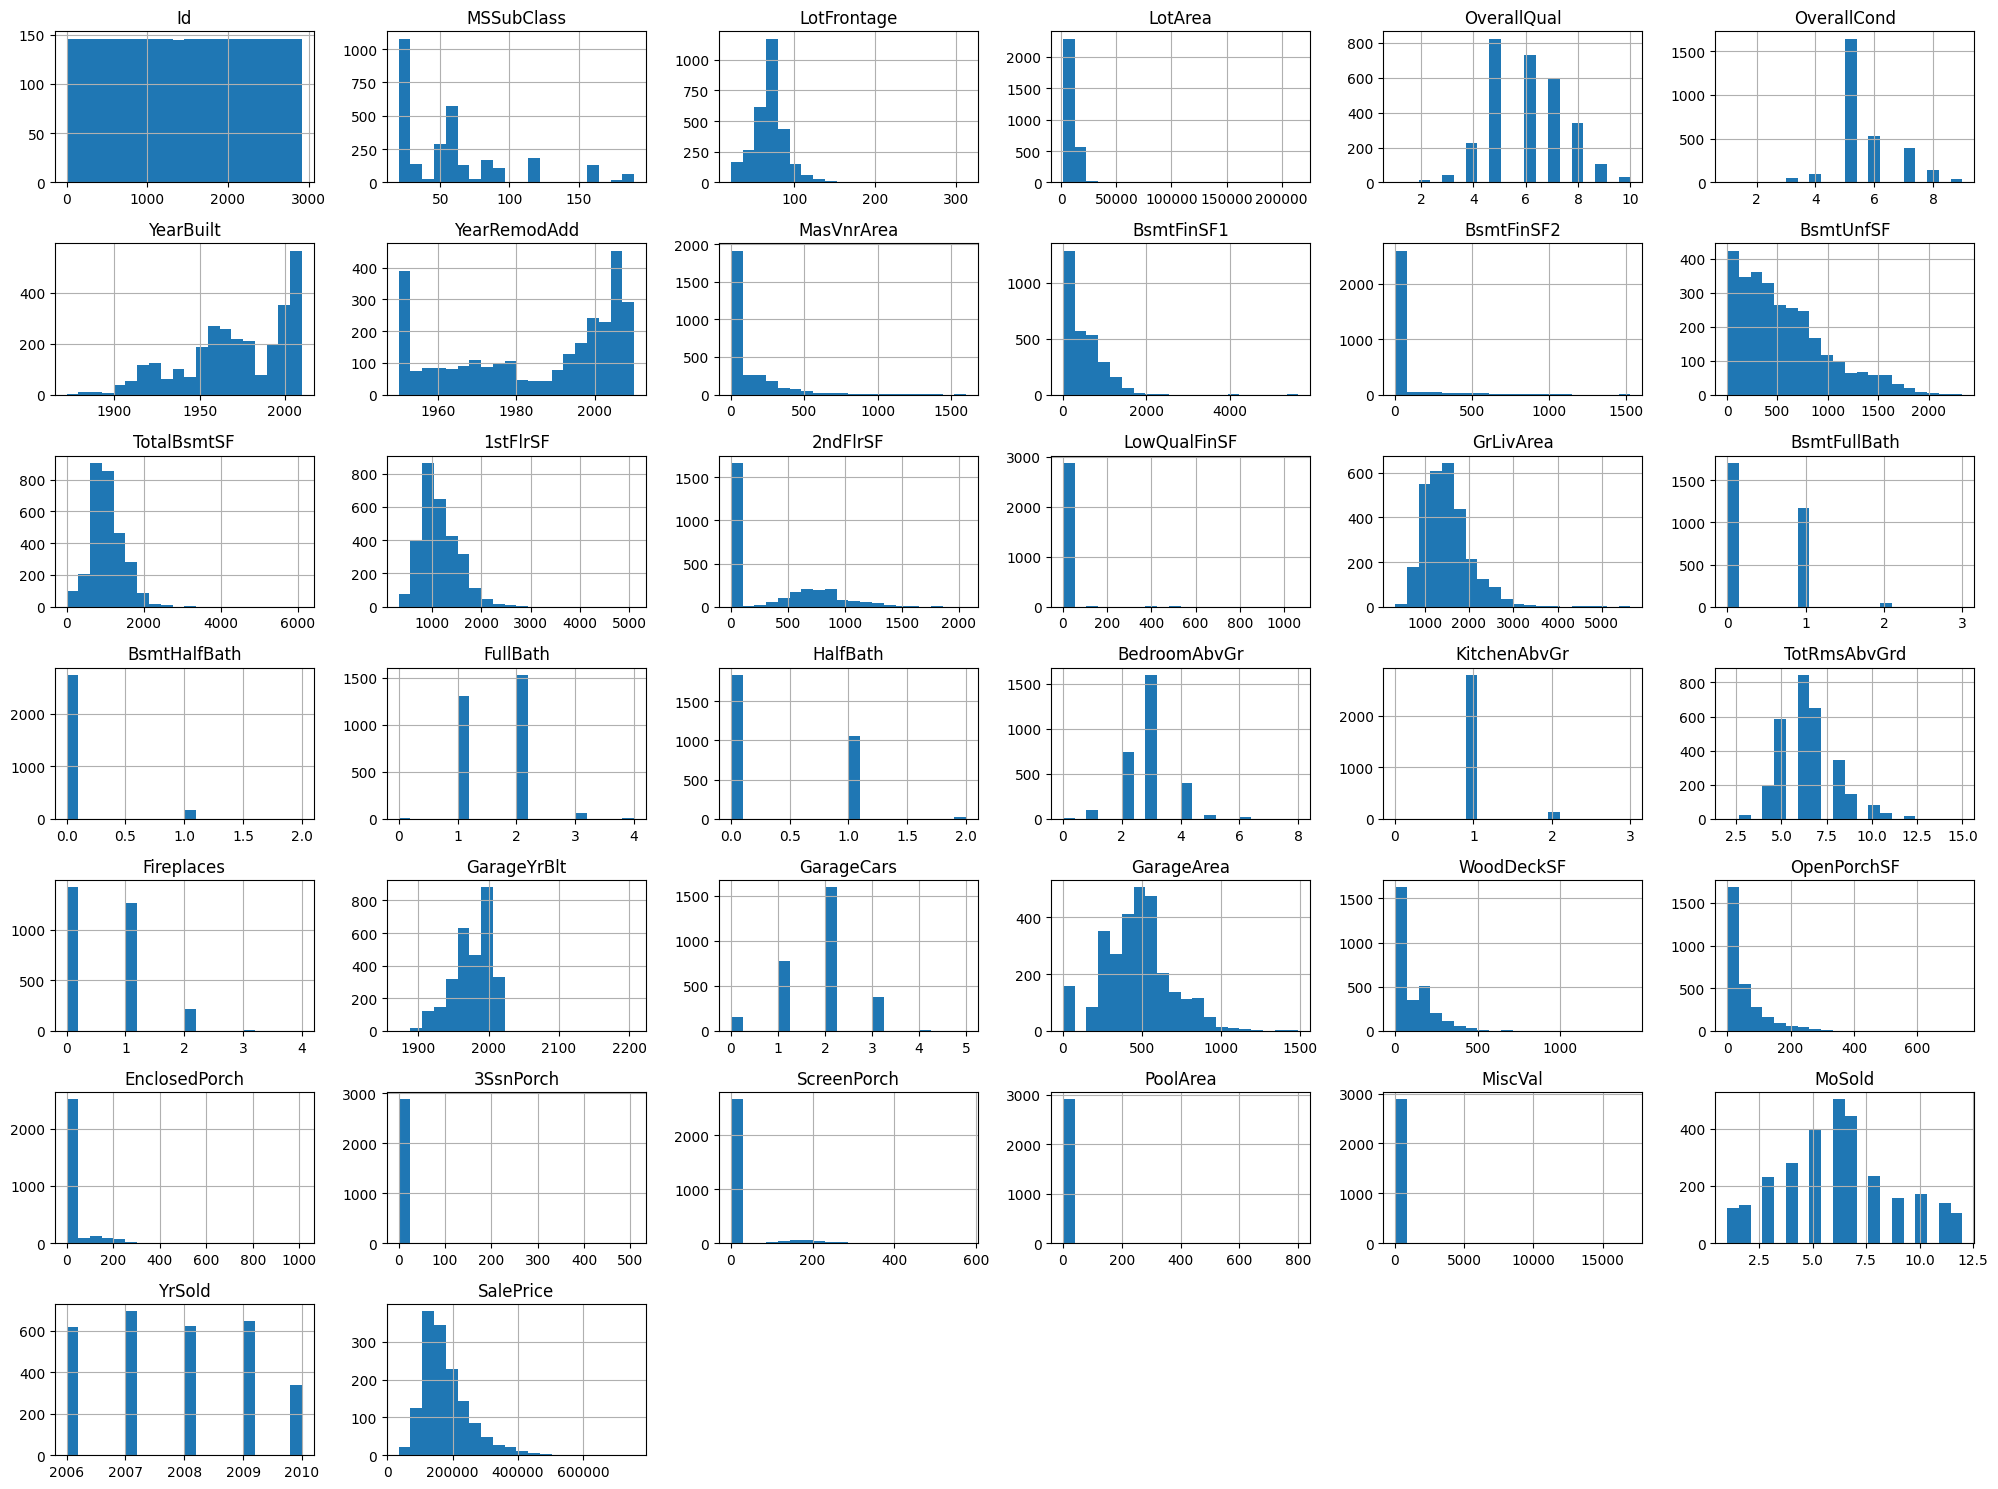

In [ ]:
# Plot histograms
df.hist(figsize=(20, 15), bins=20)
plt.tight_layout()
plt.show()

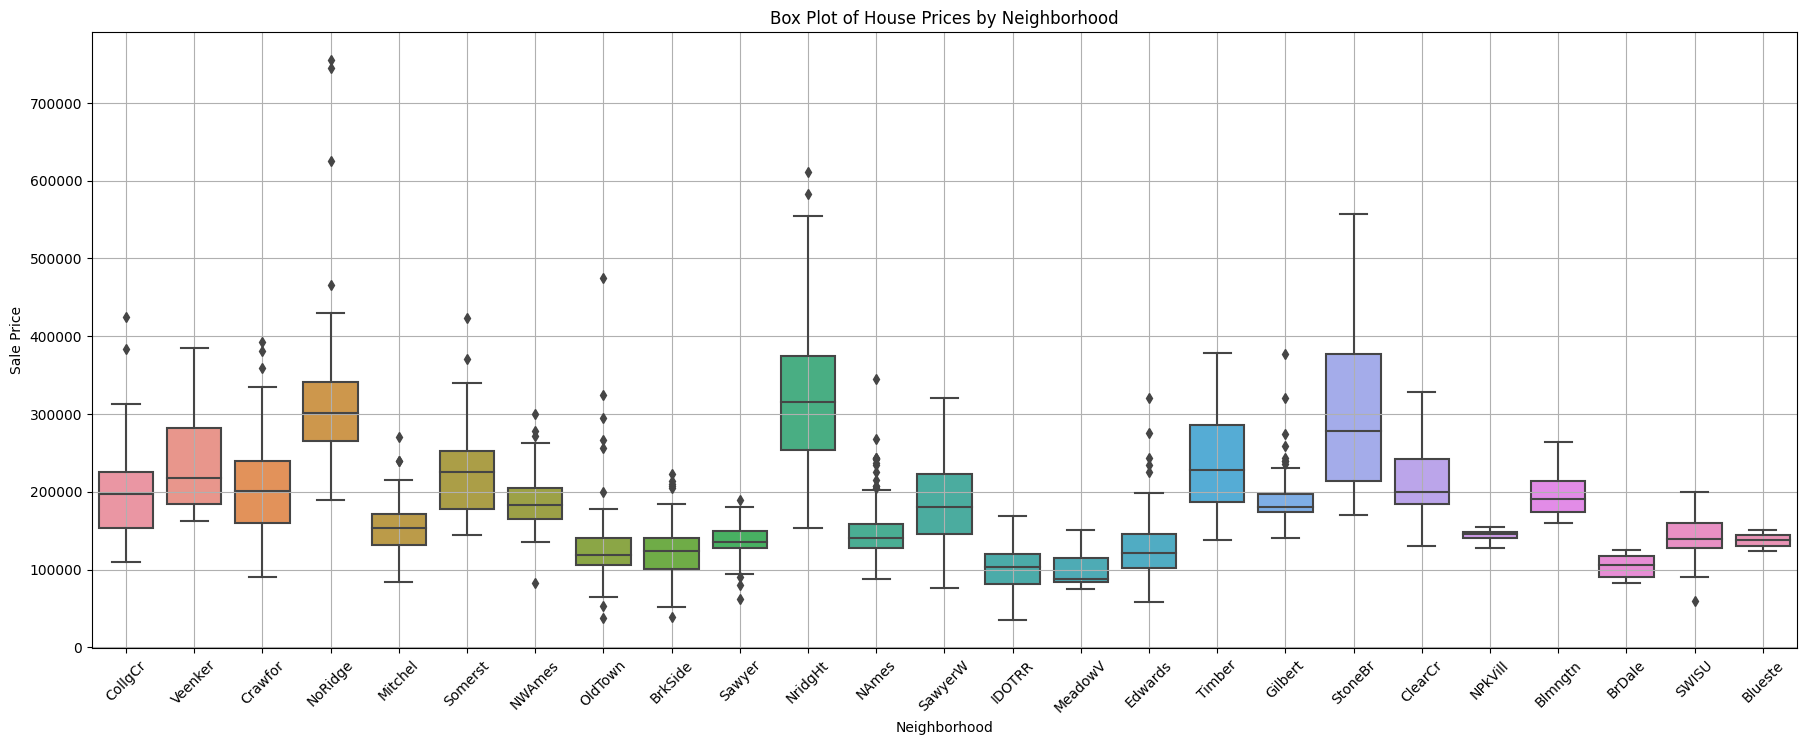

In [42]:
plt.figure(figsize=(22, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=45)
plt.title('Box Plot of House Prices by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_cols]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(22, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

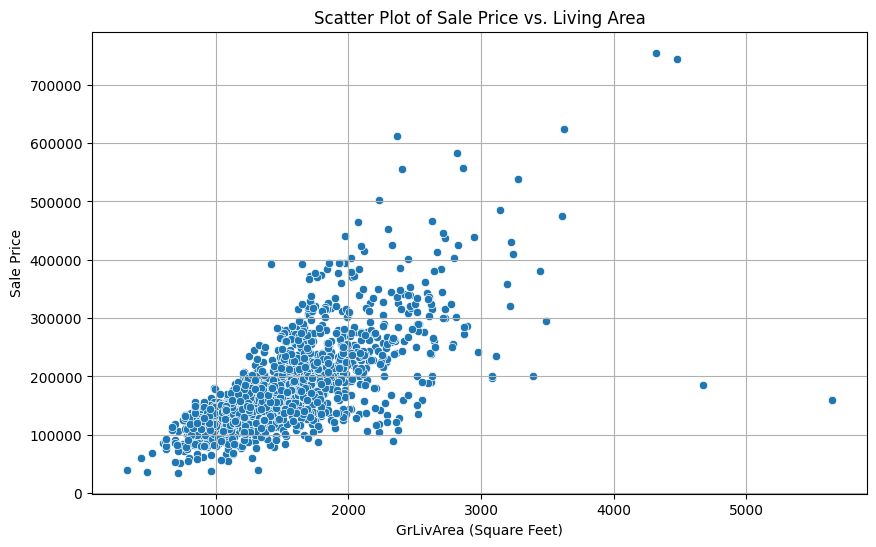

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Scatter Plot of Sale Price vs. Living Area')
plt.xlabel('GrLivArea (Square Feet)')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

**Feature engineering**

In [45]:
# Function to display unique values of each categorical column
def display_unique_values(df):
    for column in df.select_dtypes(include=['object']).columns:
        unique_values = df[column].unique()
        print(f"Unique values in '{column}': {unique_values}")

# Call the function
display_unique_values(df)

Unique values in 'MSZoning': ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in 'Street': ['Pave' 'Grvl']
Unique values in 'LotShape': ['Reg' 'IR1' 'IR2' 'IR3']
Unique values in 'LandContour': ['Lvl' 'Bnk' 'Low' 'HLS']
Unique values in 'Utilities': ['AllPub' 'NoSeWa']
Unique values in 'LotConfig': ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Unique values in 'LandSlope': ['Gtl' 'Mod' 'Sev']
Unique values in 'Neighborhood': ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Unique values in 'Condition1': ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Unique values in 'Condition2': ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Unique values in 'BldgType': ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Unique values in 'HouseStyle': ['2Story' '1Story' '1.5Fin' '1.5Unf' 

In [46]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [47]:
# One-Hot Encoding for nominal categories

one_hot_cols = [
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
    'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
    'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 
    'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition'
]
df = pd.get_dummies(df, columns=one_hot_cols)


In [48]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Label Encoding for ordinal categories
label_cols = [
    'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
    'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 
    'GarageQual', 'GarageCond'
]

label_encoders = {}  # Dictionary to store the label encoders
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for the column
    
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols.drop('Id')
# Create a copy of the DataFrame
df_standardized = df.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
# Display the resulting DataFrame
print(df)

        Id  MSSubClass  LotFrontage   LotArea  LandSlope  OverallQual  \
0        1    0.067331    -0.202068 -0.217879   -0.21626     0.646183   
1        2   -0.873616     0.501870 -0.072044   -0.21626    -0.063185   
2        3    0.067331    -0.061280  0.137197   -0.21626     0.646183   
3        4    0.302568    -0.436714 -0.078385   -0.21626     0.646183   
4        5    0.067331     0.689587  0.518903   -0.21626     1.355551   
...    ...         ...          ...       ...        ...          ...   
2914  2915    2.419700    -2.266952 -1.043937   -0.21626    -1.481920   
2915  2916    2.419700    -2.266952 -1.049263   -0.21626    -1.481920   
2916  2917   -0.873616     4.256207  1.246808   -0.21626    -0.772552   
2917  2918    0.655424    -0.342855  0.034605   -0.21626    -0.772552   
2918  2919    0.067331     0.220295 -0.068620    3.80453     0.646183   

      OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ...  SaleType_ConLw  \
0       -0.507284   1.046258      0.896833  

**modeling**

In [49]:
# Create training and testing DataFrames
train_df = df[~df['SalePrice'].isna()].copy()
test_df = df[df['SalePrice'].isna()].copy()

# Drop 'SalePrice' column from test_df
test_df.drop(columns=['SalePrice'], inplace=True)

In [50]:
X = train_df.drop(columns = ['SalePrice'])
y = train_df['SalePrice']

In [51]:
print(test_df.shape)
print(X.shape)

(1459, 232)
(1460, 232)


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.476274302612988


In [54]:
# Make predictions
test_predictions = model.predict(test_df)

# Create a submission file
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_predictions})
submission.shape


(1459, 2)

In [55]:
submission.to_csv('submission.csv', index=False)